## 2 - Bayes risk with Absolute Loss

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

Etant donné l'indépendance des questions 1 et 2, nous allons étudier premièrement la deuxième question qui vise à généraliser $f^*$  avec l'`absolute loss` $l_1$

### **Question 2 (M)**

On donne
$g(z) = \int_{y\in\mathbb{R}}|y - z|p_{Y|X=x}(y)dy$ <br>

$g(z) = \int_{-\infty}^z(z-y)p_{Y|X=x}(y)dy + \int_{z}^{+\infty}(y-z)p_{Y|X=x}(y)dy$ <br>

</br>Pour trouver le minimum de $g$, on dérive par rapport à $z$ et on cherche $z$ tel que $\frac{\partial g(z)}{\partial z} = 0$.<br>

$g(z) =z\int_{-\infty}^z  P_{Y|X=x}(y)dy - \int_{-\infty}^z y P_{Y|X=x}(y)dy+\int_{z}^{+\infty} y P_{Y|X=x}(y)dy-z\int_{z}^{+\infty}  P_{Y|X=x}(y)dy$

$\frac{\partial g(z)}{\partial z}=\int_{-\infty}^z  P_{Y|X=x}(y)dy+zP_{Y|X=x}(z)-zP_{Y|X=x}(z)-zP_{Y|X=x}(z)-\int_{z}^{+\infty}  P_{Y|X=x}(y)dy+zP_{Y|X=x}(z)$

$\frac{\partial g(z)}{\partial z}=\int_{-\infty}^z P_{Y|X=x}(y)dy-\int_{z}^\infty P_{Y|X=x}(y)dy$

$\frac{\partial g(z)}{\partial z}=P(Y\le z | X=x) - P(Y\ge z | X=x)$

$\frac{\partial g(z)}{\partial z}=P(Y\le z | X=x) - (1-P(Y\le z | X=x))$

$\frac{\partial g(z)}{\partial z}=2P(Y\le z | X=x) - 1$



$\frac{\partial g(z)}{\partial z}=0 \implies 2P(Y\le z | X=x) - 1 \implies P(Y\le z | X=x)=\frac{1}{2}$<br>
On a alors $\frac{\partial g(z_0)}{\partial z}=0$  pour $z_0=Med(Y|X=x)$ <br>

$2P(Y\le z | X=x) - 1$ est une fonction strictement croissante car $P(Y\le z | X=x)$ est une fonction de répartition.<br>
Donc $\frac{\partial g(z)}{\partial z}$ est croissante on a alors:
- $\forall z\lt z_0, \frac{\partial g(z)}{\partial z} \lt 0 \implies g$ décroissante sur $]-\infty,z_0[$ <br>
    Ainsi $\forall z\lt z_0, g(z) > g(z_0)$ $(i)$
- $\forall z\gt z_0, \frac{\partial g(z)}{\partial z} \gt 0 \implies g$ croissante sur $]z_0,+\infty[$  <br>
    Ainsi $\forall z\gt z_0, g(z) > g(z_0)$ $(ii)$

D'après $(i)$ et $(ii)$ $z_0=Med(Y|X=x)$ minimise g(z) <br>


Enfin, l'estimateur de Bayes associé à l'`absolute loss` est donc $$f^*(x) = Med(Y\ |\ X=x)$$

### **Question 1 (M + C)**

Propose a setting where the Bayes predictor is different for
the square loss and for the absolute loss, and compute the value of both. Run si-
mulations that verify your results by approximating the Bayes risks for both losses
with empirical test errors, as in section

On propose $X\sim \mathcal{U}_{\{ 1 ... k \} }$ une loi discrète uniforme sur $k \in \mathbb{N}^*$
et 
$Y|X=x \sim \mathcal{E}(\lambda = \frac{1}{x})$

- D'après l'énoncé  $f^*(x)=E[Y|=x]$ lorsque la loss se calcule avec $l_{2}$
- D'après le résultat de la question 2 on a $f^*(x)=Med(Y|X=x)$ lorsque la loss se calcule avec $l_{1}$

On a  $Y|X=x \sim \mathcal{E}(\lambda = \frac{1}{x})$

Pour $Z\sim \mathcal{E}(\lambda_{Z})$
- $Med(Z) = \frac{ln(2)}{\lambda_{Z}}$ 
- $E[Z] =  \frac{1}{\lambda_{Z}}$

## Risque Bayesien $R_{l_1}^*$ 

Pour l'absolute loss $l_1$ $f_{l_1}^*(x) = Med(Y|X=x)=\frac{ln(2)}{\frac{1}{x}} = ln(2)x$ <br>

$R_{l_1}^*=E_{X,Y}[l(Y,f^*(X))]$ <br>
$R_{l_1}^*=E_{X}[E_Y[\ l(Y,f^*(X))|X]\ ]$ <br>
$R_{l_1}^*=E_{X}[E_Y[\ |Y-f^*(X)| \ |X]\ ]$ <br>
$R_{l_1}^*=E_{X}[E_Y[\ |Y-Med(Y|X)| \ |X]\ ]$ <br>



$m=Med(Y|X=x)=ln(2)x$<br>
$E_Y[\ |Y-m| \ |X=x]\ ] = $ <br>
$E_Y[\ |Y-m| \ |X=x]\ ] =-\int_{-\infty}^m (y-m)P_{Y|X=x}(y)dy+\int_{m}^\infty (y-m)P_{Y|X=x}(y)dy$<br>
$E_Y[\ |Y-m| \ |X=x]\ ] =m(\int_{-\infty}^m P_{Y|X=x}(y)dy-\int_{m}^{+\infty} P_{Y|X=x}(y)dy) - \int_{-\infty}^m yP_{Y|X=x}(y)dy+\int_{m}^{+\infty} yP_{Y|X=x}(y)dy$<br>


$m(\int_{-\infty}^m P_{Y|X=x}(y)dy-\int_{m}^{+\infty} P_{Y|X=x}(y)dy) = m(P(Y \lt m|X=x) - P(Y \gt m|X=x)) = 0$ car $m$ est la médiane<br>


$E_Y[\ |Y-m| \ |X=x]\ ] = - \int_{-\infty}^m yP_{Y|X=x}(y)dy+\int_{m}^{+\infty} yP_{Y|X=x}(y)dy$<br>
$E_Y[\ |Y-m| \ |X=x]\ ] = E[Y|x=x]- 2\int_{-\infty}^m yP_{Y|X=x}(y)dy$<br>
$E_Y[\ |Y-m| \ |X=x]\ ] = E[Y|x=x]- 2\int_{-\infty}^m yP_{Y|X=x}(y)dy$<br>



$\int_{-\infty}^m yP_{Y|X=x}(y)dy=\int_{0}^m yP_{Y|X=x}(y)dy$ car $y<0 \implies P_{Y|X=x}(y)=0$<br>
$\int_{0}^m yP_{Y|X=x}(y)dy=\int_{0}^m \lambda y e^{-\lambda y}dy$<br>
$\int_{0}^m \lambda y e^{-\lambda y}dy=$



$\left[ -y e^{-\lambda y} - \frac{1}{\lambda}e^{-\lambda y}\right]_0^m$<br>
$\left[ -y e^{-\lambda y} - \frac{1}{\lambda}e^{-\lambda y}\right]_0^m=\left[ -e^{-\lambda y}(y+\frac{1}{\lambda})\right]_0^m$<br>
$\left[ -e^{-\lambda y}(y+\frac{1}{\lambda})\right]_0^m=-e^{-\lambda m}(m+\frac{1}{\lambda})+\frac{1}{\lambda}$<br>


$m=\frac{ln(2)}{\lambda}=ln(2)x \implies e^{-\lambda m}=\frac{1}{2}$<br>
$\lambda=\frac{1}{x}$<br>


$-e^{-\lambda m}(m+\frac{1}{\lambda})+\frac{1}{\lambda}=-\frac{1}{2}(ln(2)x+x)+x=\frac{x}{2}(1-ln(2))$<br>
$\int_{-\infty}^m yP_{Y|X=x}(y)dy = \frac{x}{2}(1-ln(2))$<br>



$E_Y[\ |Y-m| \ |X=x]\ ]= E[Y|x=x]- 2\int_{-\infty}^m yP_{Y|X=x}(y)dy=x-2(\frac{x}{2}(1-ln(2)))=ln(2)x$

$R_{l_1}^*=E_{X}[E_Y[\ |Y-Med(Y|X)| \ |X]\ ]=E_{X}[ln(2)X]=ln(2)E_{X}[X]=ln(2)\frac{k+1}{2}$

Ainsi pour $l_1$ on a $R_{l_1}^*=ln(2)\frac{k+1}{2}$


## Risque Bayesien pour $l_2$
Pour la squared loss $l_2$ $f^*(x)= E[Y|=x] =\frac{1}{\frac{1}{x}} = x$ <br>
$R_{l_2}^*=E_{X,Y}[l(Y,f^*(X))]$ <br>
$R_{l_2}^*=E_{X}[E_Y[\ l(Y,f^*(X))|X]\ ]$ <br>
$R_{l_2}^*=E_{X}[E_Y[\ (Y-f^*(X))^2|X]\ ]$ <br>
$E_Y[\ (Y-f^*(X))^2|X]=E_Y[\ (Y-E[Y|X])^2|X]$ <br>
Dans cette expression nous observons une formule de la forme $E[(Z-E[Z])^2]$ qui correspond à $V(Z)$ 

On a donc $E_Y[\ (Y-E[Y|X])^2|X]=E_{X}[V[\ Y\ |\ X] ]$ Qui correspond à la variance conditionnelle de $Y|X$


Ainsi $R_{l_2}^*=E_{X}[V_Y[Y|X] ]$ pour $l=l_2$<br>
Dans notre cas $E_{X}[V_Y[Y|X] ]$ vaut $\sum_{i=1}^kV(Y|X=x_i)*P(X=x_i)$ <br>
$\forall i \in [1,k]:$
- $P(X=x_i)=\frac{1}{k}$<br>
-  $x_i=i$<br>


$Y|X=x \sim \mathcal{E}(\lambda = \frac{1}{x})$ donc $V(Y|X=i)=i^2$<br>
Ainsi<br>
$R_{l_2}^*=E_{X}[V_Y[Y|X] ] =\frac{1}{k}\sum_{i=1}^{k}i^2=\sum_{i=1}^{k} i^2 = \frac{1}{k}\frac{k(k+1)(2k+1)}{6}=\frac{(k+1)(2k+1)}{6}$<br>
Ainsi $R_{l_2}^*=\frac{(k+1)(k+1)}{6}$<br>


On a donc  $R_{l_1}^*=ln(2)\frac{k+1}{2}$ et $R_{l_2}^*=\frac{(k+1)(2k+1)}{6}$ 

## Lancement de la simulation et calcul du risque empirique $R_n$

Risque Bayesien pour l1 9.011
Risque empirique pour l1 9.006
Différence entre le risque empirique et le risque Bayesien:0.005
-----
Risque Bayesien pour l1 221.000
Risque empirique pour l2 220.543
Différence entre le risque empirique et le risque Bayesien:0.457


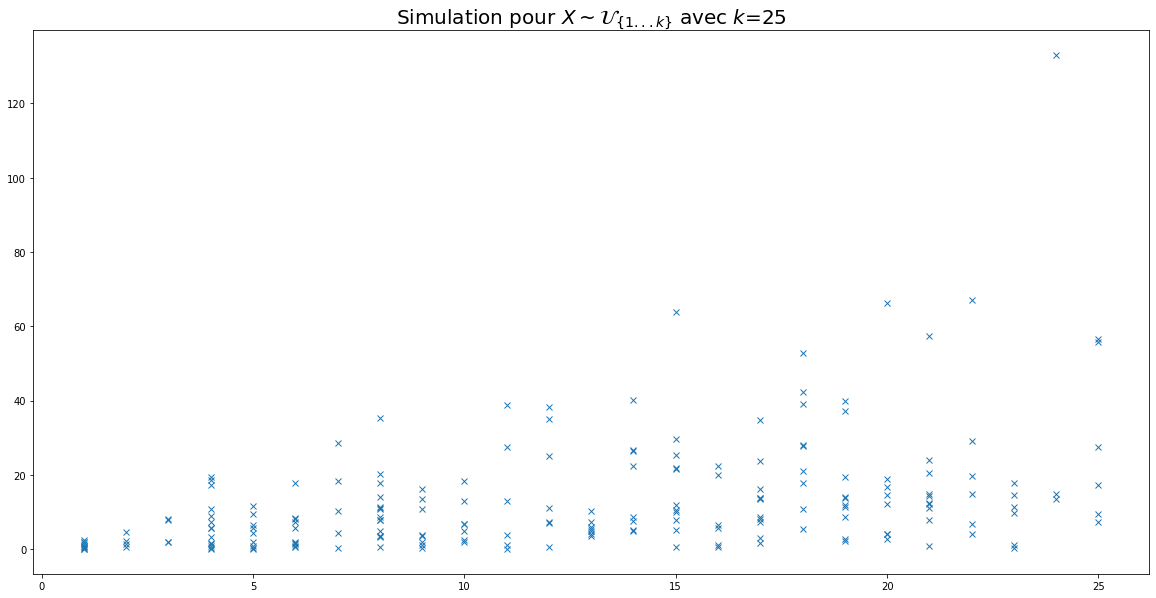

(9.010913347279288, 9.005807609977627, 221.0, 220.54264525709652)

In [2]:
def make_simulation(
    k=500, n_samples=int(1e6), n_samples_to_display=1000, display=False
) -> None:
    X = np.random.randint(low=1, high=k + 1, size=n_samples)
    y = rng.exponential(scale=X)  # X car pour exponential  scale = 1/lambda

    estimator_l1 = lambda x: np.log(2) * x
    empirical_risk_l1 = np.mean(np.abs(y - estimator_l1(X)))
    r_star_l1 = np.log(2) * ((k + 1) / 2)

    estimator_l2 = lambda x: x
    empirical_risk_l2 = np.mean((y - estimator_l2(X)) ** 2)
    r_star_l2 = (k + 1) * (2 * k + 1) / 6
    if display:
        fig, (graph_ax) = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
        print(f"Risque Bayesien pour l1 {r_star_l1:.3f}")
        print(f"Risque empirique pour l1 {empirical_risk_l1:.3f}")
        print(
            f"Différence entre le risque empirique et le risque Bayesien:{np.abs(r_star_l1 - empirical_risk_l1):.3f}"
        )
        print("-----")
        print(f"Risque Bayesien pour l1 {r_star_l2 :.3f}")
        print(f"Risque empirique pour l2 {empirical_risk_l2:.3f}")
        print(
            f"Différence entre le risque empirique et le risque Bayesien:{np.abs(r_star_l2 - empirical_risk_l2):.3f}"
        )
        title = "$ X \sim \mathcal{U}_{\{1...k\}}$"
        graph_ax.set_title(
            f"Simulation pour {title} avec $k$={k}", fontdict={"fontsize": 20}
        )
        graph_ax.plot(X[:n_samples_to_display], y[:n_samples_to_display], "x")
        plt.show()
    return r_star_l1, empirical_risk_l1, r_star_l2, empirical_risk_l2


make_simulation(k=25, n_samples=int(1e7), n_samples_to_display=200, display=True)

On peut remarquer que les risques empiriques se rapprochent des risques Bayesiens expliqués antérieurement.

Cherchons maintenant à comparer les risques empiriques et Bayesiens pour plusieurs valeurs de $k$ 

In [24]:
k_list = [5, 10, 20, 50, 100, 500, 1000, int(1e5)]

risks_list = []
for k in k_list:
    risks_list.append(
        make_simulation(k=k, n_samples=int(1e7), n_samples_to_display=200)
    )

risks = np.asarray(risks_list)
print(risks)

[[2.07944154e+00 2.07975374e+00 1.10000000e+01 1.10167824e+01]
 [3.81230949e+00 3.81176754e+00 3.85000000e+01 3.85051278e+01]
 [7.27804540e+00 7.27312318e+00 1.43500000e+02 1.43442254e+02]
 [1.76752531e+01 1.76813653e+01 8.58500000e+02 8.59614505e+02]
 [3.50039326e+01 3.49850652e+01 3.38350000e+03 3.37615192e+03]
 [1.73633369e+02 1.73614034e+02 8.35835000e+04 8.35148782e+04]
 [3.46920164e+02 3.46683272e+02 3.33833500e+05 3.33626584e+05]
 [3.46577056e+04 3.46343902e+04 3.33338333e+09 3.33020413e+09]]


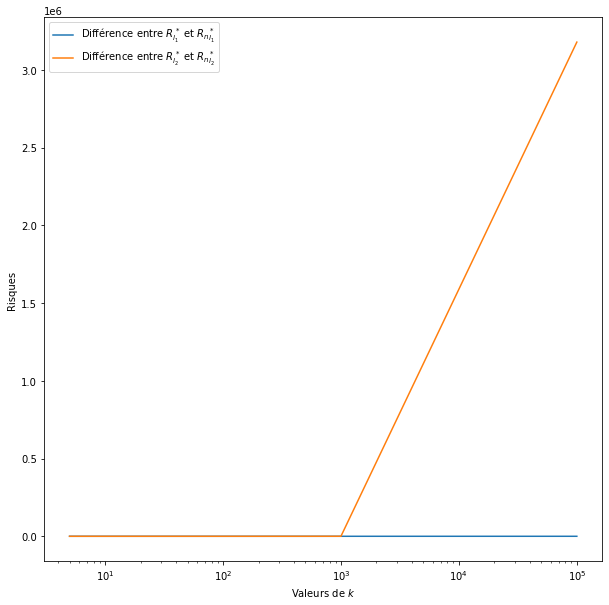

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
label_list = ["r_star_l1", "empirical_risk_l1", "r_star_l2", "empirical_risk_l2"]
for i, label in enumerate(label_list):
    # axs.plot(k_list,risks[:,i],label= label)
    break
axs.plot(
    k_list,
    risks[:, 0] - risks[:, 1],
    label="Différence entre $R_{l_1}^*$ et ${R_n}_{l_1}^*$",
)
axs.plot(
    k_list,
    risks[:, 2] - risks[:, 3],
    label="Différence entre $R_{l_2}^*$ et ${R_n}_{l_2}^*$",
)
axs.set_xscale("log")
# axs.set_yscale("log")
axs.set_xlabel("Valeurs de $k$")
axs.set_ylabel("Risques")
axs.legend()
plt.show()